In [1]:
from cosmic import MC_samp
import numpy as np
import pandas as pd
import GW_calcs
import MW_maker
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import colors
# Constants
Rsun_au = 1/215.032
day_yr = 1/365.25
yr_sec = 3.155e7
G = 6.67e-11
c = 2.998e+8
Msun = 1.989e30
parsec = 3.086e+19

pcolors = ['#7fcdbb',  '#225ea8', '#081d58', 'black']

Tobs=8
SNR_lim = 7

Load Fixed Population
===

In [2]:
# Read the COSMIC fixed population

# Data path and date file
data_path = './DATA/'

file_name_1 = 'dat_kstar1_10_13_kstar2_10_13_SFstart_10000_SFduration_0_metallicity_0.0223.h5'
file_name_2 = 'dat_kstar1_10_13_kstar2_10_13_SFstart_11000_SFduration_0_metallicity_0.0185.h5'
file_name_3 = 'dat_kstar1_10_13_kstar2_10_13_SFstart_11000_SFduration_0_metallicity_0.0208.h5'
file_name_4 = 'dat_kstar1_10_13_kstar2_10_13_SFstart_11000_SFduration_0_metallicity_0.022.h5'

# Read in pandas DataFrame
conv_1 = pd.read_hdf(data_path + file_name_1, key='conv')
conv_2 = pd.read_hdf(data_path + file_name_2, key='conv')
conv_3 = pd.read_hdf(data_path + file_name_3, key='conv')
conv_4 = pd.read_hdf(data_path + file_name_4, key='conv')

print('', 'conv pop num 1:', len(conv_1), '\n',
          'conv pop num 2:', len(conv_2), '\n',
          'conv pop num 3:', len(conv_3), '\n',
          'conv pop num 4:', len(conv_4), '\n')


# ==============================================================
# Compute total mass of fixed pop
m_sim_1 = pd.read_hdf(data_path + file_name_1, key='mass_stars')
m_sim_tot_1 = m_sim_1.max()[0]
m_sim_2 = pd.read_hdf(data_path + file_name_2, key='mass_stars')
m_sim_tot_2 = m_sim_2.max()[0]
m_sim_3 = pd.read_hdf(data_path + file_name_3, key='mass_stars')
m_sim_tot_3 = m_sim_3.max()[0]
m_sim_4 = pd.read_hdf(data_path + file_name_4, key='mass_stars')
m_sim_tot_4 = m_sim_4.max()[0]

# Set the base-model astrophysical mass
# Assume it to be 1e10 solar mass, scale back later
m_astro = 1e10   # <=== Baseline astrophysical mass
base_dist = 1000 # <=== Baseline astrophysical distance

# Find galaxy astrophysical stellar pop
n_astro_1 = int(len(conv_1) * m_astro / m_sim_tot_1)
n_astro_2 = int(len(conv_2) * m_astro / m_sim_tot_2)
n_astro_3 = int(len(conv_3) * m_astro / m_sim_tot_3)
n_astro_4 = int(len(conv_4) * m_astro / m_sim_tot_4)

print('', 'astro pop num 1:', n_astro_1, '\n',
          'astro pop num 2:', n_astro_2, '\n',
          'astro pop num 3:', n_astro_3, '\n',
          'astro pop num 4:', n_astro_4)

 conv pop num 1: 215722 
 conv pop num 2: 214174 
 conv pop num 3: 203287 
 conv pop num 4: 207601 

 astro pop num 1: 124665109 
 astro pop num 2: 135909144 
 astro pop num 3: 133022331 
 astro pop num 4: 131738093


Making Full Galaxise
===

In [5]:
# ===================================
# Generating galaxy binary population
# ===================================

# =========== Set Base-line Model ===========

# Set the base-model astrophysical mass
# Assume it to be 1e10 solar mass, 1000 Mpc scale back later
m_astro = 1e10
base_dist = 1000

model = 'ThinDisk'

'''
kstars = [[10, 10], [10, 11], [11, 10],
          [11, 11], [11, 12], [12, 11],
          [12, 12], [12, 13], [13, 12],
          [13, 13], [13, 14], [14, 13],
          [14, 14]]
'''

print('', 'pop 1:', '\n', 
          'Conv pop num:', len(conv_1), '\n', 
          'Conv pop mass:', m_sim_tot_1, '\n',
          'Astro pop num:', n_astro_1)
print('', 'pop 2:', '\n', 
          'Conv pop num:', len(conv_2), '\n', 
          'Conv pop mass:', m_sim_tot_2, '\n',
          'Astro pop num:', n_astro_2)
print('', 'pop 3:', '\n', 
          'Conv pop num:', len(conv_3), '\n', 
          'Conv pop mass:', m_sim_tot_3, '\n',
          'Astro pop num:', n_astro_3)
print('', 'pop 4:', '\n', 
          'Conv pop num:', len(conv_4), '\n', 
          'Conv pop mass:', m_sim_tot_4, '\n',
          'Astro pop num:', n_astro_4)
print('Base-model astrophysical binaries mass:', 1e10)
print('=============================', '\n')


# =============================================
# ===== Generate galaxy binary population =====
# (This may take a while, ~10 min)
# (Run with memory > 50G)
# =============================================

glx_pop_file_name_1 = 'glx_pop_1.h5'
glx_pop_file_name_2 = 'glx_pop_2.h5'
glx_pop_file_name_3 = 'glx_pop_3.h5'
glx_pop_file_name_4 = 'glx_pop_4.h5'

print('Begin generating galaxy pops.', '\n')

# =========================================================
print('Generating galaxy pop 1...')
glx_pop = MW_maker.LISA_Galaxy(conv=conv_1, 
                               model=model, 
                               m_sim_tot=m_sim_tot_1, 
                               kstars='all stars')
glx_pop.to_hdf(data_path + glx_pop_file_name_1, key='conv')
print('Galaxy pop 1 data done.')

# =========================================================
print('Generating galaxy pop 2...')
glx_pop = MW_maker.LISA_Galaxy(conv=conv_2, 
                               model=model, 
                               m_sim_tot=m_sim_tot_2, 
                               kstars='all stars')
glx_pop.to_hdf(data_path + glx_pop_file_name_2, key='conv')
print('Galaxy pop 2 data done.')

# =========================================================
print('Generating galaxy pop 3...')
glx_pop = MW_maker.LISA_Galaxy(conv=conv_3, 
                               model=model, 
                               m_sim_tot=m_sim_tot_3, 
                               kstars='all stars')
glx_pop.to_hdf(data_path + glx_pop_file_name_3, key='conv')
print('Galaxy pop 3 data done.')

# =========================================================
print('Generating galaxy pop 4...')
glx_pop = MW_maker.LISA_Galaxy(conv=conv_4, 
                               model=model, 
                               m_sim_tot=m_sim_tot_4, 
                               kstars='all stars')
glx_pop.to_hdf(data_path + glx_pop_file_name_4, key='conv')
print('Galaxy pop 4 data done.', '\n')

print('Galaxy populaitons all done!')

 pop 1: 
 Conv pop num: 215722 
 Conv pop mass: 17304119.90700576 
 Astro pop num: 124665109
 pop 2: 
 Conv pop num: 214174 
 Conv pop mass: 15758615.813292218 
 Astro pop num: 135909144
 pop 3: 
 Conv pop num: 203287 
 Conv pop mass: 15282170.85702444 
 Astro pop num: 133022331
 pop 4: 
 Conv pop num: 207601 
 Conv pop mass: 15758615.813292217 
 Astro pop num: 131738093
Base-model astrophysical binaries mass: 10000000000.0

Begin generating galaxy pops. 

Generating galaxy pop 1...
The number of binaries in the population is: 538553272
filtered numbers 115109327
Galaxy pop 1 data done.
Generating galaxy pop 2...
The number of binaries in the population is: 587127505
filtered numbers 121096727
Galaxy pop 2 data done.
Generating galaxy pop 3...
The number of binaries in the population is: 574656472
filtered numbers 119549193
Galaxy pop 3 data done.
Generating galaxy pop 4...
The number of binaries in the population is: 569108562
filtered numbers 119334034
Galaxy pop 4 data done. 

Galax

Compute Galaxy GW Power
===

In [6]:
# =====================
# Compute GW LISA Power
# (~10 min)
# =====================

'''
Compute the base-model LISA power
Where:
Luminosity distance = 1000 kpc
Galaxy stellar mass = 1e10 solar mass

Notice:
Units in COSMIC differenct than GWGC
COSMIC[kpc] - GWGC[Mpc]
'''

# Load galaxy date files
glx_file_name_1 = 'glx_pop_1.h5'
glx_file_name_2 = 'glx_pop_2.h5'
glx_file_name_3 = 'glx_pop_3.h5'
glx_file_name_4 = 'glx_pop_4.h5'

glx_pop_1 = pd.read_hdf(data_path + glx_file_name_1, key='conv')
glx_pop_2 = pd.read_hdf(data_path + glx_file_name_2, key='conv')
glx_pop_3 = pd.read_hdf(data_path + glx_file_name_3, key='conv')
glx_pop_4 = pd.read_hdf(data_path + glx_file_name_4, key='conv')
print('Galaxy data file loaded.', '\n')

model = 'ThinDisk'


# ================== Astrophysical Parameters =================
# Scale the simulation power to astrophysical parameter

n_pop_1 = MC_samp.mass_weighted_number(component_mass=MC_samp.select_component_mass(model),
                                         dat=conv_1,
                                         total_sampled_mass=m_sim_tot_1)
n_pop_2 = MC_samp.mass_weighted_number(component_mass=MC_samp.select_component_mass(model),
                                         dat=conv_2,
                                         total_sampled_mass=m_sim_tot_2)
n_pop_3 = MC_samp.mass_weighted_number(component_mass=MC_samp.select_component_mass(model),
                                         dat=conv_3,
                                         total_sampled_mass=m_sim_tot_3)
n_pop_4 = MC_samp.mass_weighted_number(component_mass=MC_samp.select_component_mass(model),
                                         dat=conv_4,
                                         total_sampled_mass=m_sim_tot_4)

# astrophysical to simulation binary number ratio
m_ratio_1 = n_astro_1/n_pop_1
m_ratio_2 = n_astro_2/n_pop_2
m_ratio_3 = n_astro_3/n_pop_3
m_ratio_4 = n_astro_4/n_pop_4

print('', 'Astro to Sim m ratio 1:', round(m_ratio_1, 12), '\n',
          'Astro to Sim m ratio 2:', round(m_ratio_2, 12), '\n',
          'Astro to Sim m ratio 3:', round(m_ratio_3, 12), '\n',
          'Astro to Sim m ratio 4:', round(m_ratio_4, 12), '\n')


# ============ Compute LISA Power ============
# (Take ~ 5min, take another break)
# Power file names
power_file_name_1 = 'glx_power_1.h5'
power_file_name_2 = 'glx_power_2.h5'
power_file_name_3 = 'glx_power_3.h5'
power_file_name_4 = 'glx_power_4.h5'
print('Begin computing LISA GW power.', '\n')


# =========================================================
print('Computing galaxy GW power 1...')
glx_pop = glx_pop_1
m_ratio = m_ratio_1
power_file_name = power_file_name_1
glx_pop.dist = glx_pop.dist*0 + base_dist
LISA_power = GW_calcs.LISA_power(glx_pop, Tobs)
LISA_power.strain_2 = LISA_power.strain_2 * m_ratio
LISA_power.to_hdf(data_path + power_file_name, key='power')
print('Galaxy GW power 1 done.')
# =========================================================
print('Computing galaxy GW power 2...')
glx_pop = glx_pop_2
m_ratio = m_ratio_2
power_file_name = power_file_name_2
glx_pop.dist = glx_pop.dist*0 + base_dist
LISA_power = GW_calcs.LISA_power(glx_pop, Tobs)
LISA_power.strain_2 = LISA_power.strain_2 * m_ratio
LISA_power.to_hdf(data_path + power_file_name, key='power')
print('Galaxy GW power 2 done.')
# =========================================================
print('Computing galaxy GW power 3...')
glx_pop = glx_pop_3
m_ratio = m_ratio_3
power_file_name = power_file_name_3
glx_pop.dist = glx_pop.dist*0 + base_dist
LISA_power = GW_calcs.LISA_power(glx_pop, Tobs)
LISA_power.strain_2 = LISA_power.strain_2 * m_ratio
LISA_power.to_hdf(data_path + power_file_name, key='power')
print('Galaxy GW power 3 done.')
# =========================================================
print('Computing galaxy GW power 4...')
glx_pop = glx_pop_4
m_ratio = m_ratio_4
power_file_name = power_file_name_4
glx_pop.dist = glx_pop.dist*0 + base_dist
LISA_power = GW_calcs.LISA_power(glx_pop, Tobs)
LISA_power.strain_2 = LISA_power.strain_2 * m_ratio
LISA_power.to_hdf(data_path + power_file_name, key='power')
print('Galaxy GW power 4 done.', '\n')

print('Galaxy GW powers all done!')

Galaxy data file loaded. 

 Astro to Sim m ratio 1: 0.231481481 
 Astro to Sim m ratio 2: 0.23148148033 
 Astro to Sim m ratio 3: 0.231481480644 
 Astro to Sim m ratio 4: 0.231481481384 

Begin computing LISA GW power. 

Computing galaxy GW power 1...


/projects/b1094/wyy6563/EXTRA_GLA/GW_power/GW_calcs.py:585: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d=np.array(dat_circ.dist))**2
/projects/b1094/wyy6563/EXTRA_GLA/GW_power/GW_calcs.py:587: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_circ['digits'] = np.digitize(dat_circ.f_gw_peak, LISA_freq)


Galaxy GW power 1 done.
Computing galaxy GW power 2...
Galaxy GW power 2 done.
Computing galaxy GW power 3...
Galaxy GW power 3 done.
Computing galaxy GW power 4...
Galaxy GW power 4 done. 

Galaxy GW powers all done!


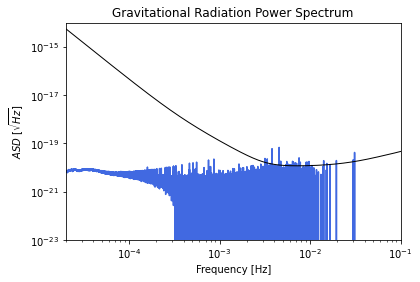

Number of base-line model population: 25239975


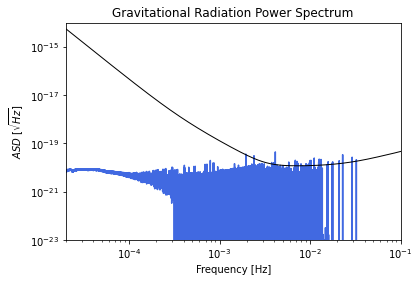

Number of base-line model population: 25239975


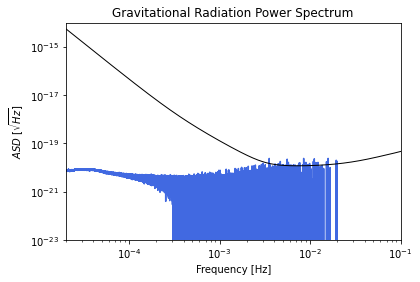

Number of base-line model population: 25239975


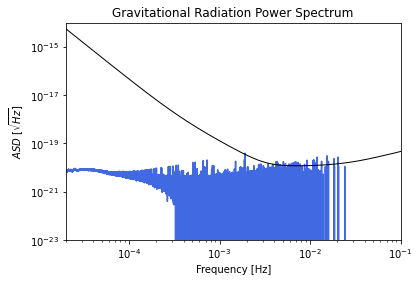

Number of base-line model population: 25239975


In [7]:
# Plot the total gravitational wave power of galaxy binaries
# against the LISA curve

# Import power data from saved file
LISA_PSD = GW_calcs.lisa_PSD()

LISA_power_1 = pd.read_hdf(data_path + 'glx_power_1.h5', key='power')
LISA_power_2 = pd.read_hdf(data_path + 'glx_power_2.h5', key='power')
LISA_power_3 = pd.read_hdf(data_path + 'glx_power_3.h5', key='power')
LISA_power_4 = pd.read_hdf(data_path + 'glx_power_4.h5', key='power')

# ==================================================================
LISA_power = LISA_power_1
plt.plot(LISA_power.f_gw, (LISA_power.strain_2*Tobs*yr_sec)**0.5, 
         color='royalblue', rasterized=True)
plt.plot(np.linspace(5e-6, 0.1, 10000), 
        (LISA_PSD(np.linspace(5e-6, 0.1, 10000)))**0.5, 
         lw=1, color='black')

plt.xscale('log')
plt.yscale('log')
plt.xlim(2e-5, 1e-1)
plt.ylim(1e-23, 1e-14)
plt.xlabel('Frequency [Hz]')
plt.ylabel('$ASD$ [$\sqrt{Hz}$]')
plt.title('Gravitational Radiation Power Spectrum')
plt.show()
print('Number of base-line model population:', len(LISA_power))
# ==================================================================
LISA_power = LISA_power_2
plt.plot(LISA_power.f_gw, (LISA_power.strain_2*Tobs*yr_sec)**0.5, 
         color='royalblue', rasterized=True)
plt.plot(np.linspace(5e-6, 0.1, 10000), 
        (LISA_PSD(np.linspace(5e-6, 0.1, 10000)))**0.5, 
         lw=1, color='black')

plt.xscale('log')
plt.yscale('log')
plt.xlim(2e-5, 1e-1)
plt.ylim(1e-23, 1e-14)
plt.xlabel('Frequency [Hz]')
plt.ylabel('$ASD$ [$\sqrt{Hz}$]')
plt.title('Gravitational Radiation Power Spectrum')
plt.show()
print('Number of base-line model population:', len(LISA_power))
# ==================================================================
LISA_power = LISA_power_3
plt.plot(LISA_power.f_gw, (LISA_power.strain_2*Tobs*yr_sec)**0.5, 
         color='royalblue', rasterized=True)
plt.plot(np.linspace(5e-6, 0.1, 10000), 
        (LISA_PSD(np.linspace(5e-6, 0.1, 10000)))**0.5, 
         lw=1, color='black')

plt.xscale('log')
plt.yscale('log')
plt.xlim(2e-5, 1e-1)
plt.ylim(1e-23, 1e-14)
plt.xlabel('Frequency [Hz]')
plt.ylabel('$ASD$ [$\sqrt{Hz}$]')
plt.title('Gravitational Radiation Power Spectrum')
plt.show()
print('Number of base-line model population:', len(LISA_power))
# ==================================================================
LISA_power = LISA_power_4
plt.plot(LISA_power.f_gw, (LISA_power.strain_2*Tobs*yr_sec)**0.5, 
         color='royalblue', rasterized=True)
plt.plot(np.linspace(5e-6, 0.1, 10000), 
        (LISA_PSD(np.linspace(5e-6, 0.1, 10000)))**0.5, 
         lw=1, color='black')

plt.xscale('log')
plt.yscale('log')
plt.xlim(2e-5, 1e-1)
plt.ylim(1e-23, 1e-14)
plt.xlabel('Frequency [Hz]')
plt.ylabel('$ASD$ [$\sqrt{Hz}$]')
plt.title('Gravitational Radiation Power Spectrum')
plt.show()
print('Number of base-line model population:', len(LISA_power))